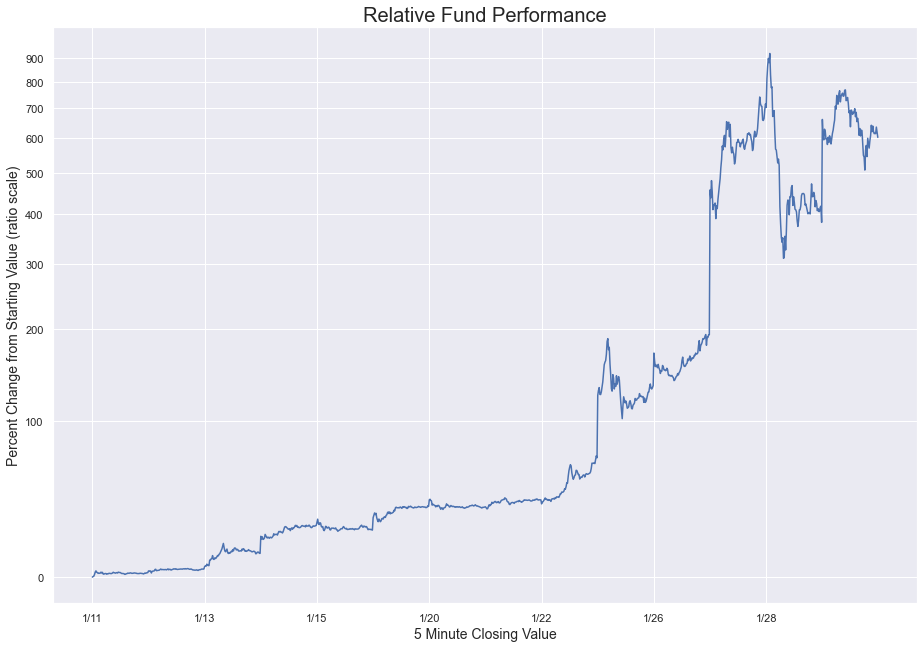

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style="darkgrid")
import sys
sys.path.insert(0,'C:\\Users\\mattn\\Documents\PythonScripts')

import yfinance as yf
import pandas as pd
import numpy as np

wsb = ['GME', 'AMC', 'BBBY', 'KOSS', 'BB', 'EXPR', 'IRBT', 'FIZZ']

data = pd.DataFrame()
norm_close = pd.DataFrame()

data = yf.download(wsb, start="2021-01-11", end="2021-01-30", interval='5m', progress=False)
closedata = data['Close'].ffill()
for ticker in closedata.columns:
    norm_close[ticker] = closedata[ticker]/closedata[ticker][0]
    
norm_close['Portfolio Value'] = norm_close.sum(axis=1)/len(wsb)*100# - 100

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0, 0, 1, 1]) # main axes
plotdata = norm_close['Portfolio Value'].to_numpy()
xticks = np.arange(0, len(plotdata), len(plotdata)/7, dtype=int)

xlables = ['1/11', '1/13', '1/15', '1/20', '1/22', '1/26', '1/28']
ax.set_xticks(xticks)
ax.set_xticklabels(xlables)
ax.set_xlabel("5 Minute Closing Value", fontsize=14)
ax.set_ylabel('Percent Change from Starting Value (ratio scale)', fontsize=14)
ax.set_title('Relative Fund Performance', fontsize=20)

ax.set_yscale('log', basey=2)        
ytick_min = np.round(plotdata.min() / 10)*10                
yticks = np.arange(ytick_min, plotdata.max(), 100, dtype=int)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks - 100)

fig = ax.plot(plotdata, 'b', label='wallstreetbets stocks')

Just for fun, wouldn't it be great to have bought shares in the most shorted stocks 3 weeks ago?  These stocks are some of the most talked about on the Reddit wallstreetbets sub-reddit. 


In [3]:
def listFund(fund, fundName):
    print(f'{fundName:19} = ', end='')
    for ticker in fund[0:-1]:print(ticker + ", ", end='')
    print(fund[-1])
    
listFund(wsb, 'Reddit WallStreetBets stocks')

Reddit WallStreetBets stocks = GME, AMC, BBBY, KOSS, BB, EXPR, IRBT, FIZZ


Notes:  The vertical axis in the plot above shows the percent change from the starting value with dividends accrued but not reinvested and an initial purchase of the same amount in dollars for each stock.  All stocks are held for the duration and none added.  While not normal for a mutual fund it does partially implement the useful addage "ride your winners and sell your losers" since over time the winners will tend to dominate fund performance and the losers eventually become irrelevant.  The scale shown is a ratio scale, so changes of say 100% early in the chart display the same as changes of 100% later, even in the case where the fund value has increased signifcantly.  Using this scale avoids reinforcing another common blindspot, that of over-emphasizing recent information.  Performance of the S&P 500, including dividends, is shown for baseline comparison.